In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

### Data Acquisition

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
648,female,group B,high school,standard,none,50,53,55
521,female,group C,associate's degree,standard,none,91,86,84
593,female,group E,high school,standard,none,74,76,73
325,female,group C,some college,standard,none,82,90,94
441,female,group D,high school,standard,none,78,81,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print('This dataframe has', df.shape[0], 'rows and', df.shape[1], 'columns')

This dataframe has 1000 rows and 8 columns


### Data Preparation

In [6]:
wrangle.get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

------------------------

This dataframe has 1000 rows and 8 columns.

------------------------

Null count in dataframe:
------------------------
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
916,male,group E,bachelor's degree,standard,completed,100,100,100
1,female,group C,some college,standard,completed,69,90,88
912,female,group C,bachelor's degree,standard,completed,52,61,66


In [7]:
wrangle.value_counts(df, df.columns)

gender
female    518
male      482
Name: gender, dtype: int64
-------------
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
-------------
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
-------------
lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
-------------
test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64
-------------
math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
26     1
28     1
33     1
0      1
Name: math score, Length: 81, dtype: int64
-------------
reading score
72    34
74    33
64    32
67    30
73    30
      ..
26     1
32     1
40     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64
-----------

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.rename(columns={'race/ethnicity': 'race_ethnicity',
                   'parental level of education': 'parent_education',
                   'lunch': 'lunch_type',
                   'test preparation course': 'test_prep_taken',
                   'math score': 'math_score',
                   'reading score': 'reading_score',
                   'writing score': 'writing_score',
}, inplace=True)

In [10]:
# create a column for overall grade
df['overall_grade'] = (df.math_score + df.reading_score + df.writing_score)/3

In [11]:
# grd = df.overall_grade
# for i in grd:
#     if grd > 89.99999:
#         df['letter_grade'] = 'A'
#     elif grd > 79.99999:
#         df['letter_grade'] = 'B'
#     elif grd > 69.99999:
#         df['letter_grade'] = 'C'
#     elif grd > 59.99999:
#         df['letter_grade'] = 'D'
        
#     else df['letter_grade'] = 'F'
        
        

In [12]:
df.shape

(1000, 9)

In [13]:
df.describe()

,math_score,reading_score,writing_score,overall_grade
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [14]:
# take a look at statitics for females
df[df['gender']=='female'].describe()

,math_score,reading_score,writing_score,overall_grade
count,518.000000,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181,69.569498
std,15.491453,14.378245,14.844842,14.541809
min,0.000000,17.000000,10.000000,9.000000
25%,54.000000,63.250000,64.000000,60.666667
50%,65.000000,73.000000,74.000000,70.333333
75%,74.000000,83.000000,82.000000,78.666667
max,100.000000,100.000000,100.000000,100.000000


In [15]:
# take a look at statistics for males
df[df['gender']=='male'].describe()

,math_score,reading_score,writing_score,overall_grade
count,482.000000,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203,65.837483
std,14.356277,13.931832,14.113832,13.698840
min,27.000000,23.000000,15.000000,23.000000
25%,59.000000,56.000000,53.000000,56.000000
50%,69.000000,66.000000,64.000000,66.333333
75%,79.000000,75.000000,73.750000,76.250000
max,100.000000,100.000000,100.000000,100.000000


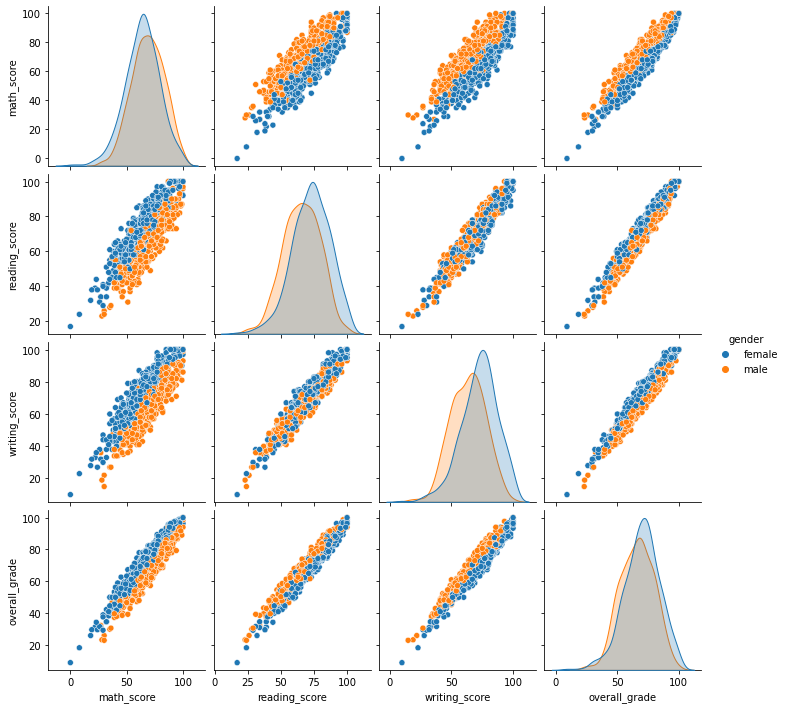

In [16]:
sns.pairplot(df, hue='gender');

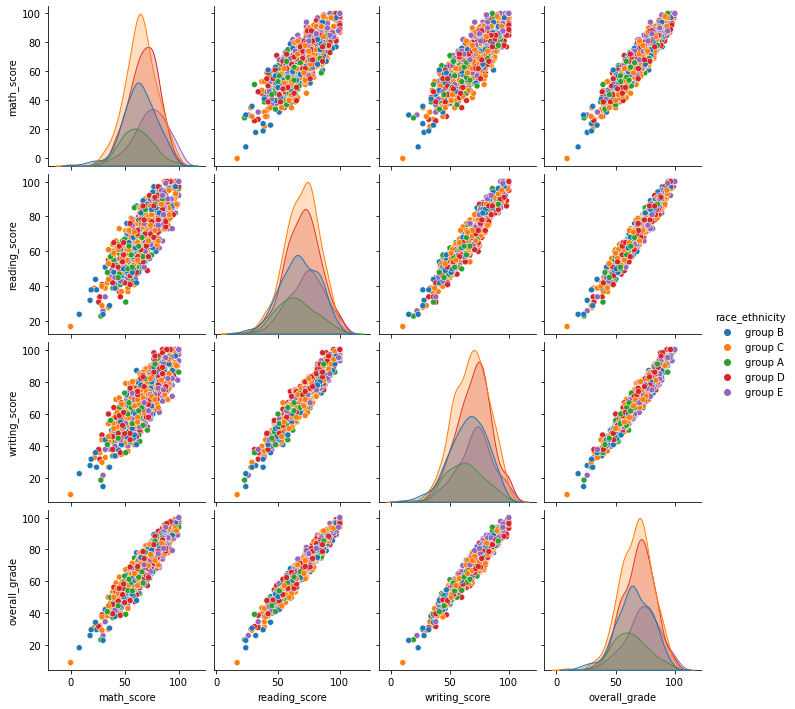

In [17]:
sns.pairplot(df, hue='race_ethnicity');

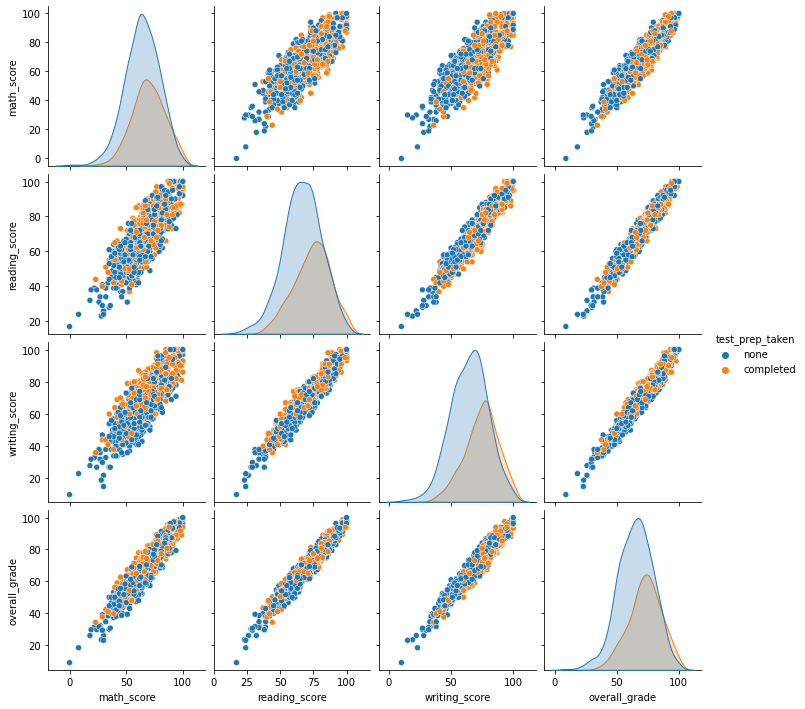

In [18]:
sns.pairplot(df, hue='test_prep_taken');

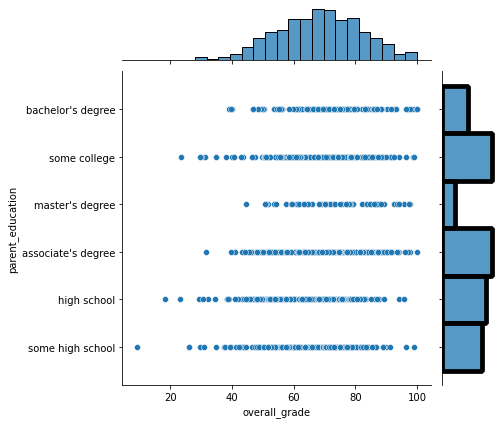

In [19]:
sns.jointplot(data=df, x='overall_grade', y='parent_education')

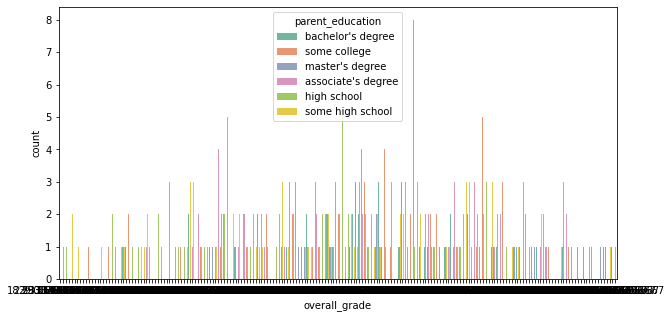

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='overall_grade', hue='parent_education', palette="Set2");

<AxesSubplot:ylabel='overall_grade'>

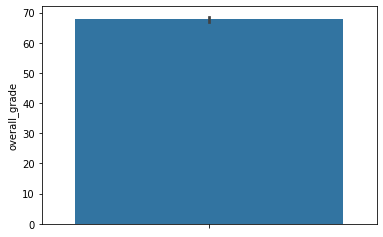

In [21]:
sns.barplot(data=df, y='overall_grade')

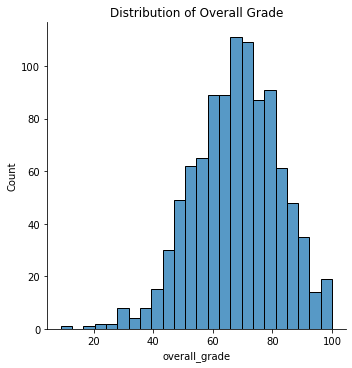

In [22]:
sns.displot(data=df, x='overall_grade')
plt.title('Distribution of Overall Grade');

In [25]:
df.corr()

,math_score,reading_score,writing_score,overall_grade
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
overall_grade,0.918746,0.970331,0.965667,1.000000


In [26]:
df.isnull().sum()

gender              0
race_ethnicity      0
parent_education    0
lunch_type          0
test_prep_taken     0
math_score          0
reading_score       0
writing_score       0
overall_grade       0
dtype: int64